In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



data=pd.read_csv(r'Advertising.csv',index_col=0,header=0)

In [2]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
data.columns


Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

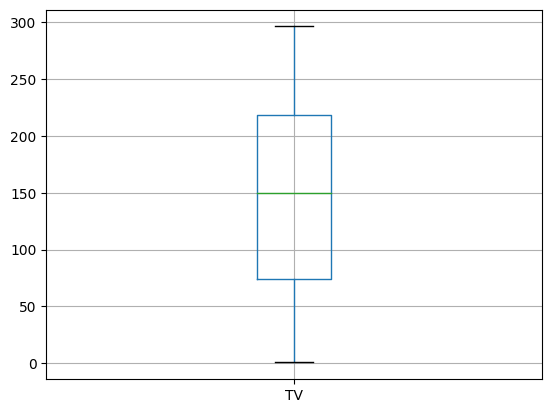

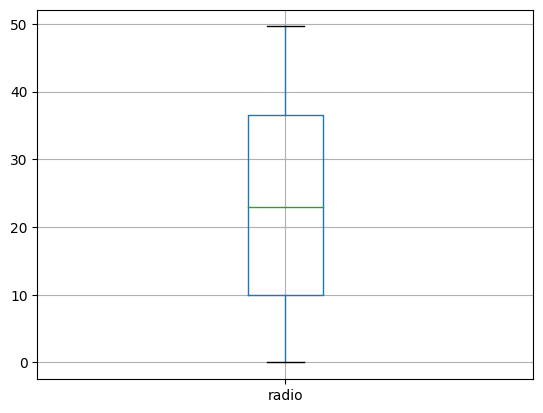

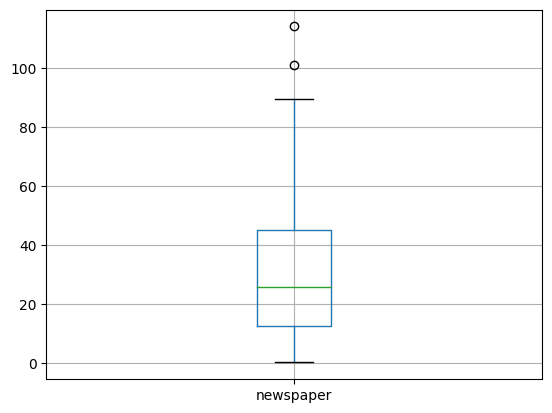

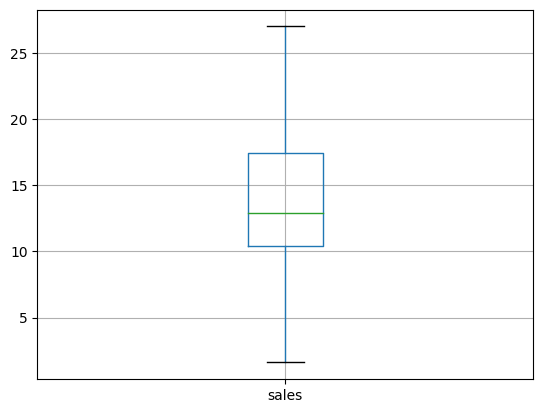

In [6]:
# assumption 1: there should be no outliers in data
# check using box plot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

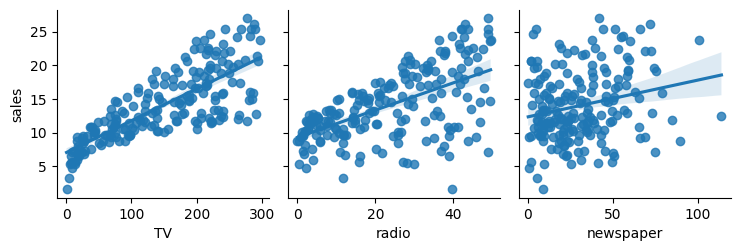

In [7]:
# assumption2: assumption of linearity: every independent variable should have a linear relationship with dependent variable

sns.pairplot(data,x_vars=['TV','radio','newspaper'],
            y_vars='sales',kind='reg')
plt.show()


In [8]:
# data.drop(['newspaper'],axis=1,inplace=True) it is used to drop outliers 
# there is no dependency between variables

In [9]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
# create x and y
x=data[['TV','radio','newspaper']]
y=data['sales']
# x=data.iloc[:,0:-1]# this is used to get the columns and rows using indexing

In [11]:
y.shape

(200,)

In [12]:
import warnings
warnings.filterwarnings('ignore')

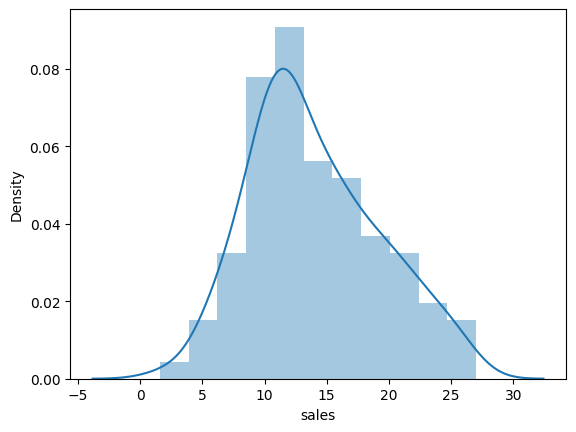

In [13]:
# assumption of normality: the dependent variable should follow and approximate
sns.distplot(y,hist=True)
plt.show()

In [15]:
# log transformation
# import numpy as np
y_log=np.log(y)  # this tansformation is used when the data is skewed

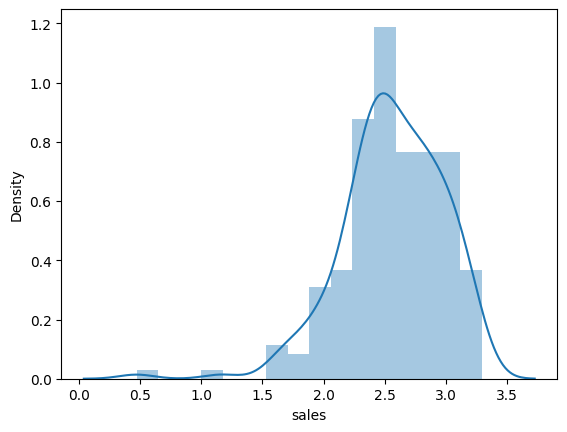

In [16]:
sns.distplot(y_log,hist=True)
plt.show()

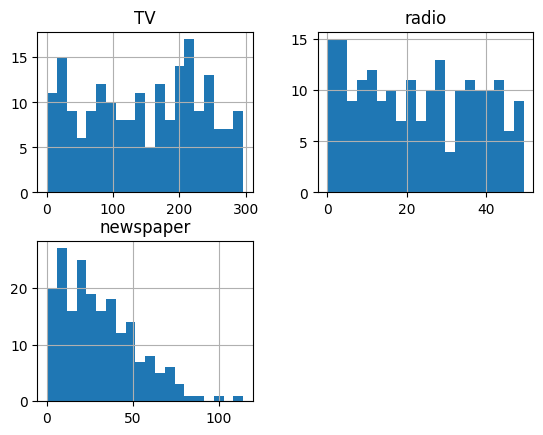

In [17]:
x.hist(bins=20)
plt.show()

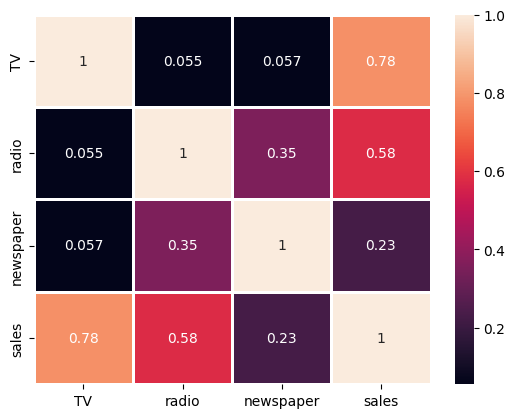

In [18]:
# assumption of multicollinearity: there should be no multicollinearity betwween 
sns.heatmap(data.corr(),
           annot=True,
           linewidths=2)
plt.show()

In [ ]:
pip install scikit-learn

In [23]:

from sklearn.model_selection import train_test_split

# split the data into test and train
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# test_size is 20% for less than 1000 observations and greater than 1000 30%

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [28]:
from sklearn.linear_model import LinearRegression
# create a model  object
lm=LinearRegression()
# train the model object
lm.fit(x_train,y_train)

# print intercept and Coefficient
print(lm.intercept_)
print(lm.coef_)

3.254097114418883
[ 0.0437726   0.19343299 -0.00222879]


In [29]:
# PAIR THR FEATURE NAME  WITH COEFFICIENTS
print(list(zip(x.columns,lm.coef_)))

[('TV', 0.043772603063046034), ('radio', 0.19343298611600768), ('newspaper', -0.002228792805605395)]


In [30]:
x# predict using the model
y_pred=lm.predict(x_test)
print(y_pred)

[18.1625299  12.92663232 18.0531098  23.64464668 20.70438374 14.28227997
 14.94493548 21.38232981 21.17508238 12.73110461 24.00312134  7.21544071
 12.24762152 19.24345998 19.38241854 13.45643798 19.6247089   9.2531648
 21.13268075 20.90762408 15.53485445 10.92529369 22.82955184 15.8122438
 17.42515749  8.16218669 11.89783444 12.70337575 21.74138085  7.96215368
 12.50099965 20.45535282  4.72120047  4.72259288 16.75292333 15.75804986
  6.74415499 17.73477354  9.01591827 13.617599  ]


In [33]:
lm.score(x_train,y_train)
# it is the r square value for the trained data it will always be higher because it is
# it will perform the below 2 steps
# y_pred=lm.predict(x_train)
#score=r2_score(y_train,y_pred)

0.9209087553499528

In [34]:
new_df=pd.DataFrame()
new_df=x_test

new_df['Actual Sales']=y_test
new_df['Predicted Sales']=y_pred

new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,9.3,18.4,18.162530
6,8.7,48.9,75.0,7.2,12.926632
21,218.4,27.7,53.4,18.0,18.053110
199,283.6,42.0,66.2,25.5,23.644647
53,216.4,41.7,39.6,22.6,20.704384
20,147.3,23.9,19.1,14.6,14.282280
163,188.4,18.1,25.6,14.9,14.944935
56,198.9,49.4,60.0,23.7,21.382330
70,216.8,43.9,27.2,22.3,21.175082
3,17.2,45.9,69.3,9.3,12.731105


In [37]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)


adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8353672324670594
RMSE: 2.58852984462781
Adj R-square: 0.8328473431680857


In [38]:
print(y_test.min())
print(y_test.max())


1.6
25.5


In [41]:
new_df['Deviation']=new_df['Actual Sales']-new_df['Predicted Sales']
new_df.to_excel('Sales Prediction.xlsx',header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,9.3,18.4,18.162530,0.237470
6,8.7,48.9,75.0,7.2,12.926632,-5.726632
21,218.4,27.7,53.4,18.0,18.053110,-0.053110
199,283.6,42.0,66.2,25.5,23.644647,1.855353
53,216.4,41.7,39.6,22.6,20.704384,1.895616


In [43]:
from sklearn.model_selection import train_test_split

# split the data into test and train
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# test_size is 20% for less than 1000 observations and greater than 1000 30%

In [44]:
# performing using ridge regression 

from sklearn.linear_model import Ridge
# create a model object
lm=Ridge()
# train the model object
lm.fit(x_train,y_train)

# print inytyercept and coefficient
print(lm.intercept_)
print(lm.coef_)

3.254199650479162
[ 0.0437726   0.19342655 -0.00222742]


In [47]:
# predict using the model
y_pred=lm.predict(x_test)
print(y_pred)

[18.16245391 12.92652317 18.05310583 23.64456781 20.70427081 14.28225391
 14.94495534 21.38219547 21.1749383  12.73100687 24.00301993  7.21553865
 12.2475655  19.24339936 19.38241343 13.45636091 19.6246441   9.2530879
 21.13256894 20.90746193 15.53483293 10.92515347 22.82945286 15.8121711
 17.42522236  8.16221866 11.89769872 12.70328706 21.74124009  7.96215012
 12.50103034 20.45525511  4.7213209   4.72273082 16.75300902 15.75816807
  6.74426955 17.73481459  9.01600544 13.617696  ]


In [46]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)


adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)




R-squared: 0.8353672324670594
RMSE: 2.58852984462781
Adj R-square: 0.8328473431680857


In [49]:
# performing using lasso regression 

from sklearn.linear_model import Lasso
# create a model object
lm=Lasso()
# train the model object
lm.fit(x_train,y_train)

# print inytyercept and coefficient
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [50]:
# predict using the model
y_pred=lm.predict(x_test)
print(y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [51]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)


adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292
